# Repaso - Módulo 2

---
## Problema 1.1. Evaluación numérica de integrales utilizando Montecarlo
Escriba la función para integrar por el método Montecarlo de tipo 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b - a)

Considere las funciones $f_1(x)=\sqrt{1+x^{4}}$, $f_2(x)=\ln(\ln x)$, $f_3(x)=\frac {1}{\ln x}$, y $f_4(x)=e^{-{\frac {x^{2}}{2}}}$.

Utilizar la función anterior para realizar la evaluación numérica de las integrales de las funciones anteriores en el intervalo $(4,5)$. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.

In [3]:
a, b = 4, 5
N = np.logspace(1, 5, 5)
print(N)

[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05]


In [4]:
def f1(x):
    return np.sqrt(1 + x**4)

In [5]:
table1 =  pd.DataFrame(columns = ["Aproximación", "Error"], index = N)

In [6]:
for i in N:
    aprox = montecarlo(f1, int(i), a, b)
    table1.loc[i, "Aproximación"] = aprox
    table1.loc[i, "Error"] = (20.3583) - aprox
    
table1

,Aproximación,Error
10.0,20.313669,0.044631
100.0,20.305628,0.052672
1000.0,20.318273,0.040027
10000.0,20.401643,-0.043343
100000.0,20.360238,-0.001938


In [7]:
def f2(x):
    return np.log(np.log(x))

In [8]:
table2 =  pd.DataFrame(columns = ["Aproximación", "Error"], index = N)

In [9]:
for i2 in N:
    aprox2 = montecarlo(f2, int(i2), a, b)
    table2.loc[i2, "Aproximación"] = aprox2
    table2.loc[i2, "Error"] = (0.405885) - aprox2
    
table2

,Aproximación,Error
10.0,0.400963,0.004922
100.0,0.409488,-0.003603
1000.0,0.408066,-0.002181
10000.0,0.405456,0.000429
100000.0,0.406181,-0.000296


In [10]:
def f3(x):
    return 1 / np.log(x)

In [11]:
table3 =  pd.DataFrame(columns = ["Aproximación", "Error"], index = N)

In [12]:
for i3 in N:
    aprox3 = montecarlo(f3, int(i3), a, b)
    table3.loc[i3, "Aproximación"] = aprox3
    table3.loc[i3, "Error"] = (0.667003) - aprox3
    
table3

,Aproximación,Error
10.0,0.679435,-0.012432
100.0,0.668464,-0.001461
1000.0,0.66705,-0.000047
10000.0,0.667228,-0.000225
100000.0,0.667027,-0.000024


In [13]:
def f4(x):
    return np.exp(-(x**2/2))

In [14]:
table4 =  pd.DataFrame(columns = ["Aproximación", "Error"], index = N)

In [15]:
for i4 in N:
    aprox4 = montecarlo(f4, int(i4), a, b)
    table4.loc[i4, "Aproximación"] = aprox4
    table4.loc[i4, "Error"] = (0.0000786695) - aprox4
    
table4

,Aproximación,Error
10.0,0.000082,-0.000004
100.0,0.000065,0.000014
1000.0,0.000078,0.0
10000.0,0.00008,-0.000001
100000.0,0.000079,-0.0


## Problema 1.2.
Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error de integración.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y grafíque esta región.

In [16]:
def bernoulli(x, y):
    return (x**2 + 2*y**2)<=(-2*x + 8*y - 7)

In [17]:
a1 = -1-np.sqrt(2)
b1 = np.sqrt(2) - 1
a2 = 1
b2 = 3

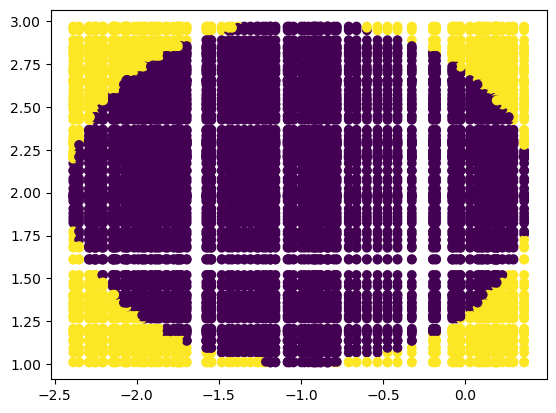

In [18]:
x = np.random.uniform(a1, b1 , 100)
y = np.random.uniform(a2, b2, 100)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=~ bernoulli(X, Y))

In [23]:
def montecarlo2(region, ax, bx, ay, by, N):
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

In [24]:
AR = (b1 - a1) * (b2 - a2)

table5 =  pd.DataFrame(columns = ["Aproximación", "Error relativo"], index = N)
for i5 in N:
    aprox = montecarlo2(bernoulli, a1, b1, a2, b2, int(i5))
    Crel = np.sqrt((1 - aprox / AR) / (aprox / AR))
    Error_rel = np.log(Crel) - ((1/2) * np.log(i5))
    table5.loc[i5, "Aproximación"] = aprox
    table5.loc[i5, "Error relativo"] = Error_rel
    
table5

,Aproximación,Error relativo
10.0,4.525483,-1.84444
100.0,4.695189,-3.095399
1000.0,4.525483,-4.147025
10000.0,4.500028,-5.284372
100000.0,4.435257,-6.401176


---
## Problema 2. Fractal aleatorio tipo Barnsley

- En la clase de fractales aleatorios vimos que el fractal helecho de Barnsley se generaba a través de cuatro transformaciones afines que se elegían con cierta probabilidad.
- Vimos que este helecho representaba de manera muy aproximada helechos reales.
- Vimos que modificando parámetros de la tabla, se podían generar mutaciones de el helecho.

Pues bien, usando la misma idea de transformaciones afines que se escogen con cierta probabilidad, se pueden generar una infinidad inimaginable de fractales. Incluso, se pueden generar fractales aleatorios que poseen un atractor determinístico.

**Referencia:**
- Barnsley, Michael F. *Fractals Everywhere: New Edition*, ISBN: 9780486320342.

Usando la siguiente tabla, evalúe el fractal de Barnsley para 100 000 puntos.

In [25]:
import random

In [26]:
i = np.arange(4)

df = pd.DataFrame(index=i,columns=['$a_i$', '$b_i$', '$c_i$', '$d_i$', '$e_i$', '$f_i$', '$p_i$'], dtype='float')
df.index.name = "$i$"

df['$a_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$b_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$c_i$'] = [0.0, 0.0, 0.0, 0.0]
df['$d_i$'] = [0.5, 0.5, 0.5, 0.5]
df['$e_i$'] = [1.0, 50.0, 1.0, 50.0]
df['$f_i$'] = [1.0, 1.0, 50.0, 50.0]
df['$p_i$'] = [0.1, 0.2, 0.3, 0.4]

#df.round(2)
df

,$a_i$,$b_i$,$c_i$,$d_i$,$e_i$,$f_i$,$p_i$
$i$,,,,,,,
0,0.5,0.0,0.0,0.5,1.0,1.0,0.1
1,0.5,0.0,0.0,0.5,50.0,1.0,0.2
2,0.5,0.0,0.0,0.5,1.0,50.0,0.3
3,0.5,0.0,0.0,0.5,50.0,50.0,0.4


### Primera manera de resoverlo 

In [28]:
x = [0]
y = [0]

N = 100000

for k in range(N):
    i_actual = random.choices(i, df['$p_i$'])
    
    a = float(df['$a_i$'][i_actual])
    b = float(df['$b_i$'][i_actual])
    c = float(df['$c_i$'][i_actual])
    d = float(df['$d_i$'][i_actual])
    e = float(df['$e_i$'][i_actual])
    f = float(df['$f_i$'][i_actual])
    
    xkm1 = a*x[-1] + b*y[-1] + e
    ykm1 = c*x[-1] + d*y[-1] + f
    
    x.append(xkm1)
    y.append(ykm1)

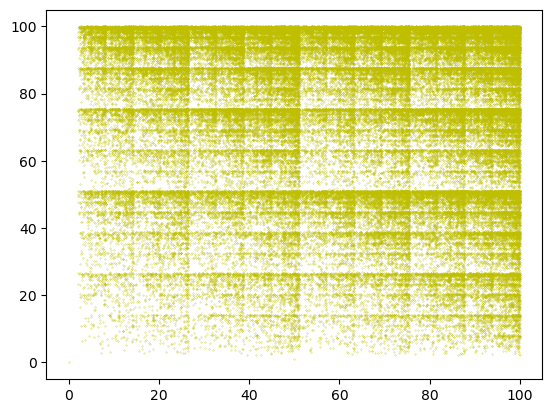

In [30]:
plt.figure()
plt.scatter(x, y, s = 0.05, c="y")

### Segunda manera de resolverlo (manera vectorial)

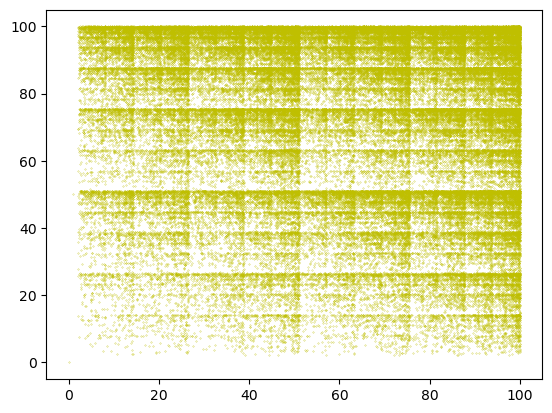

In [35]:
A0 = np.array([[0.5, 0],
               [0, 0.5]])
b0 = np.array([1,1])

A1 = np.array([[0.5,0],
               [0,0.5]])
b1 = np.array([50,1])

A2 = np.array([[0.5,0],
               [0,0.5]])
b2 = np.array([1,50])

A3 = np.array([[0.5,0],
               [0,0.5]])
b3 = np.array([50,50])

x = np.array([0, 0])
x_historial = [0]
y_historial = [0]

N = 100000

A_lista = [A0, A1, A2, A3]
b_lista = [b0, b1, b2, b3]

for k in range(N):
    i_actual = random.choices(i, df['$p_i$'])[0]
    
    A = A_lista[i_actual]
    b = b_lista[i_actual]
    
    x = A@x + b
    
    x_historial.append(x[0])
    y_historial.append(x[1])
    

plt.figure()
plt.scatter(x_historial, y_historial, s = 0.05, c="y")

---
## Problema 3. Probabilidad Precio-Umbral

En las últimas clases vimos una aplicación de simulación montecarlo. Consistía en descargar datos históricos de precio de cierre de acciones de alguna compañía, proyectar esos precios y sacar la probabilidad de que los precios en el siguiente año sobrepasaran cierto precio umbral.

En este ejemplo evaluaremos dos compañías con tendencias más o menos similares (Apple y Microsoft) veremos cuál tiene más probabilidades de darnos un interés deseado.

Además, descargaremos los datos del año 2020 para ver si el análisis concuerda.

Descargue datos para Apple y Microsoft desde enero de 2015 a diciembre de 2019 y muestre sus gráficas.

In [77]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline

In [78]:
def getClose(names, start, end):
    return yf.download(names, start = start, end = end)["Adj Close"]

In [79]:
data_aapl = getClose("AAPL", "2015-01-01", "2019-12-31")
data_msft = getClose("MSFT", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:ylabel='Frequency'>

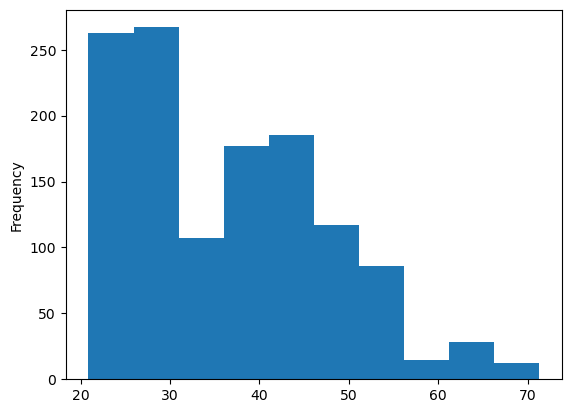

In [80]:
data_aapl.plot.hist()

<AxesSubplot:ylabel='Frequency'>

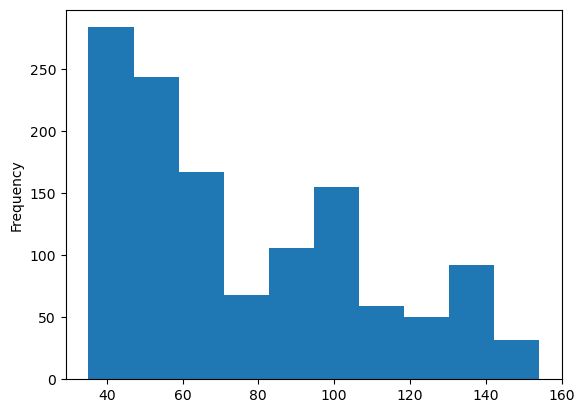

In [81]:
data_msft.plot.hist()

Calcule los rendimientos diarios junto con sus características estadísticas

In [82]:
R_aapl = (data_aapl - data_aapl.shift()) / data_aapl.shift()
R_msft = (data_msft - data_msft.shift()) / data_msft.shift()

### Apple

In [83]:
R_aapl

Date
2015-01-02         NaN
2015-01-05   -0.028172
2015-01-06    0.000094
2015-01-07    0.014022
2015-01-08    0.038422
                ...   
2019-12-23    0.016319
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000380
2019-12-30    0.005935
Name: Adj Close, Length: 1257, dtype: float64

In [84]:
R_aapl.describe()

count    1256.000000
mean        0.000971
std         0.015651
min        -0.099607
25%        -0.005857
50%         0.000892
75%         0.008924
max         0.070422
Name: Adj Close, dtype: float64

### Microsoft

In [85]:
R_msft

Date
2015-01-02         NaN
2015-01-05   -0.009196
2015-01-06   -0.014677
2015-01-07    0.012705
2015-01-08    0.029418
                ...   
2019-12-23    0.000000
2019-12-24   -0.000191
2019-12-26    0.008197
2019-12-27    0.001828
2019-12-30   -0.008619
Name: Adj Close, Length: 1257, dtype: float64

In [86]:
R_msft.describe()

count    1256.000000
mean        0.001161
std         0.014692
min        -0.092533
25%        -0.005404
50%         0.000890
75%         0.008058
max         0.104522
Name: Adj Close, dtype: float64

Simule 1000 escenarios de rendimientos diarios para el 2020 (para cada una de las empresas)

In [87]:
def sim_r(media, std, inicio, dias, N):
    # media
    #desviación estándar
    # inicio de la fecha
    # cuantos días voy a simular
    # Números de simulaciones
    r =  np.random.normal(media, std, size = (dias, N))
    fechas = pd.date_range(inicio, periods = dias)
    return pd.DataFrame(index = fechas, data = r)

### Apple

In [88]:
R_aapl_mean = R_aapl.mean()
R_aapl_std = R_aapl.std()
r_simulados_aapl = sim_r(R_aapl_mean, R_aapl_std, "2020-01-01", 366, 1000)

### Microsoft

In [89]:
R_msft_mean = R_msft.mean()
R_msft_std = R_msft.std()
r_simulados_msft = sim_r(R_msft_mean, R_msft_std, "2020-01-01", 366, 1000)

Calcule los precios con base en los rendimientos simulados

### Apple

In [90]:
precios_simulados_aapl = (r_simulados_aapl + 1).cumprod()*data_aapl[-1]

### Microsoft

In [91]:
precios_simulados_msft = (r_simulados_msft + 1).cumprod()*data_msft[-1]

Calcule la probabilidad de obtener un retorno del 20% para ambas marcas.

### Apple

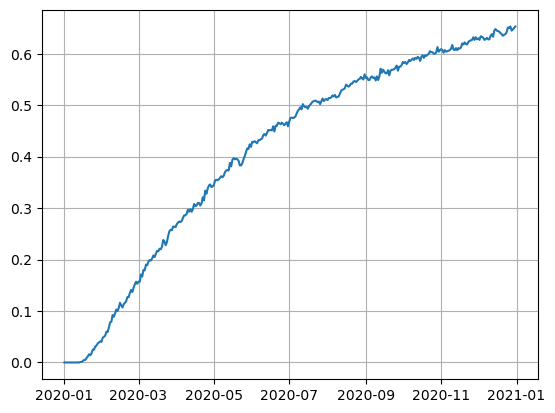

In [92]:
valor_deseado_aapl = data_aapl[-1] * 1.20
probabilidad_aapl = (precios_simulados_aapl >= valor_deseado_aapl).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_aapl)
plt.grid()

### Microsoft

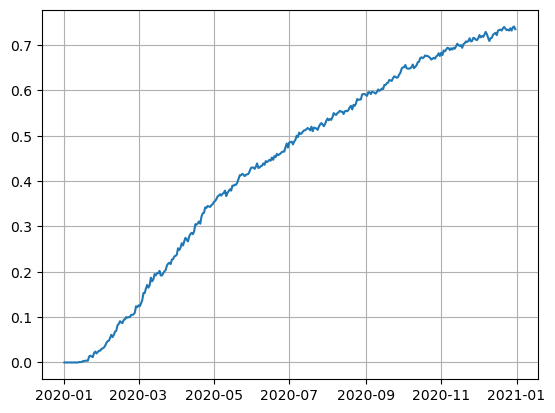

In [93]:
valor_deseado_msft = data_msft[-1] * 1.20
probabilidad_msft = (precios_simulados_msft >= valor_deseado_msft).mean(axis = 1)
plt.figure()
plt.plot(probabilidad_msft)
plt.grid()

Finalmente, grafique los datos reales del 2020 para ver que tan acertado fue nuestro análisis.

### Apple

In [94]:
data_aapl_2020 = getClose("AAPL", "2020-01-01", "2020-12-31")

[*********************100%***********************]  1 of 1 completed


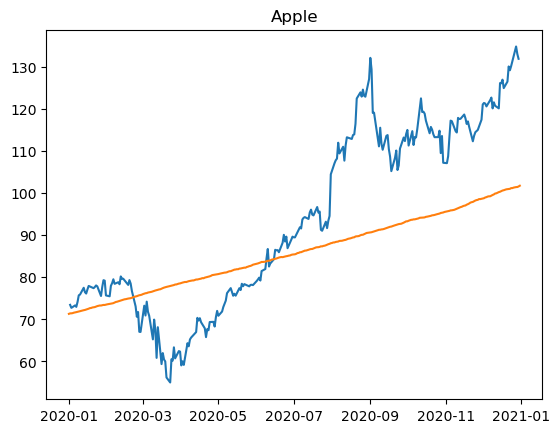

In [95]:
plt.figure()
plt.title("Apple")
plt.plot(data_aapl_2020)
plt.plot((precios_simulados_aapl).mean(axis = 1))

### Microsoft

In [96]:
data_msft_2020 = getClose("MSFT", "2020-01-01", "2020-12-31")

[*********************100%***********************]  1 of 1 completed


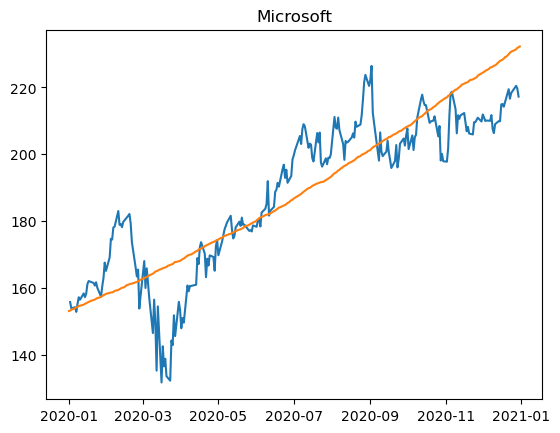

In [97]:
plt.figure()
plt.title("Microsoft")
plt.plot(data_msft_2020)
plt.plot((precios_simulados_msft).mean(axis = 1), label = "Simulados 2020")
plt.show()